인플레이션이 국내 철강 분야에 미치는 영향

In [297]:
# 모듈 설치 및 데이터 주소 설정
import pandas as pd
import matplotlib.pyplot as plt
import re
import platform
import numpy
path_price ='./data/소비자물가_2017_202206.xls'
path_oil ='./data/원유가격_202106_202205.xlsx'
path_steel ='./data/철강_가격_2017_2022.xls'
path_charge ='./data/상하이컨테이너운임지수_2022.xlsx'

# 데이터 전처리

1. 철강 가격 데이터프레임 전처리

In [298]:
df_steel

철광석종류,철광석,철스크랩-국내,철스크랩-수입,철근,열연,냉연
2017상반기,78,259,318,657,684,912
2017하반기,73,288,352,646,677,889
2018상반기,73,309,423,741,908,1056
2018하반기,74,314,397,782,916,1043
2019상반기,84,299,368,772,718,880
2019하반기,101,253,353,685,603,805
2020상반기,91,217,314,541,592,798
2020하반기,126,247,358,670,719,901
2021상반기,182,374,508,919,1511,1723
2021하반기,137,498,626,1093,2041,2354


In [306]:

# 철강 가격 데이터프레임 가공
df_steel = pd.read_excel(path_steel,header=2,thousands=',')
# 컬럼 이름 정리
df_steel = df_steel.rename(columns={'Unnamed: 0':'철광석종류'})
# 불필요한 열 제거
df_steel = df_steel.loc[:5]
# 철광석 종류 컬럼에서 str만 추출
steel_str_list=[]
for steel in df_steel['철광석종류']:
    steel_str = re.split('[()]',steel)
    steel_str_list.append(steel_str[0])    
df_steel['철광석종류'] = steel_str_list   

# 값을 int로 변환
df_steel.iloc[:,1:] = df_steel.iloc[:,1:].astype(int)
df_steel = df_steel.set_index(df_steel['철광석종류'])
df_steel = df_steel.drop('철광석종류',axis=1)
df_steel = df_steel.transpose()
# 그래프전용 리스트 성성
steel_x_list=list(df_steel.index)
steel_label = list(df_steel.columns[1:])


print(steel_x_list)
print(steel_label)


['2017상반기', '2017하반기', '2018상반기', '2018하반기', '2019상반기', '2019하반기', '2020상반기', '2020하반기', '2021상반기', '2021하반기', '2022상반기']
['철스크랩-국내', '철스크랩-수입', '철근', '열연', '냉연']


In [300]:
df_steel

철광석종류,철광석,철스크랩-국내,철스크랩-수입,철근,열연,냉연
2017상반기,78,259,318,657,684,912
2017하반기,73,288,352,646,677,889
2018상반기,73,309,423,741,908,1056
2018하반기,74,314,397,782,916,1043
2019상반기,84,299,368,772,718,880
2019하반기,101,253,353,685,603,805
2020상반기,91,217,314,541,592,798
2020하반기,126,247,358,670,719,901
2021상반기,182,374,508,919,1511,1723
2021하반기,137,498,626,1093,2041,2354


2. 소비자물가 데이터프레임 전처리

In [301]:
df_price = pd.read_excel(path_price,  header=2)
df_price = df_price.rename(columns={'Unnamed: 0':'기간'})
df_price = df_price.loc[0]
df_price

기간         소비자물가
2017         1.9
2018         1.5
2019         0.4
2020         0.5
2021         2.5
202201월      3.6
202202월      3.7
202203월      4.1
202204월      4.8
202205월      5.4
202206월      6.0
Name: 0, dtype: object

3. 원유가격 데이터프레임 전처리

In [302]:
df_oil = pd.read_excel(path_oil)
df_oil  
# df_price = df_price.rename(columns={'Unnamed: 0':'기간'})

,구 분,WTI,Brent,Dubai
0,2022년 5월,109.26,111.96,108.16
1,2022년 4월,101.64,105.92,102.82
2,2022년 3월,108.26,112.46,110.93
3,2022년 2월,91.63,94.10,92.36
4,2022년 1월,82.98,85.57,83.47
5,2021년 12월,71.69,74.80,73.21
6,2021년 11월,78.65,80.85,80.30
7,2021년 10월,81.22,83.75,81.61
8,2021년 9월,71.54,74.88,72.63
9,2021년 8월,67.71,70.51,69.50


4. 운임지수 데이터프레임 전처리

In [303]:
df_charge = pd.read_excel(path_charge)
df_charge = df_charge.iloc[:,1:]
df_charge

,2021.01.08,2021.01.15,2021.01.22,2021.01.29,2021.02.05,2021.02.10,2021.02.19,2021.02.26,2021.03.05,2021.03.12,...,2022.05.13,2022.05.20,2022.05.27,2022.06.02,2022.06.10,2022.06.17,2022.06.24,2022.07.01,2022.07.08,2022.07.15
0,2870.34,2885,2868.95,2861.69,2884.61,2825.75,2875.93,2775.29,2721.94,2637.53,...,4147.83,4162.69,4175.35,4208.01,4233.31,4221.96,4216.13,4203.27,4143.87,4074.7


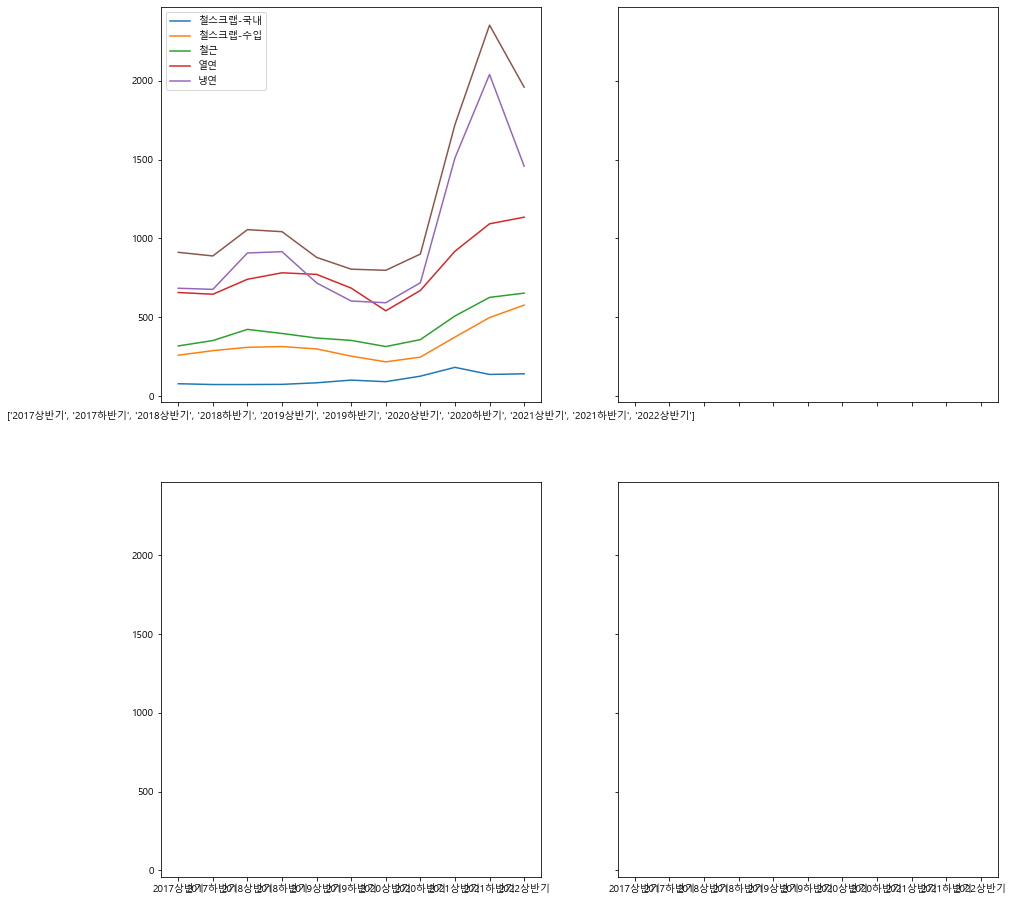

In [305]:
fig, axes = plt.subplots(2,2, figsize=(15, 16),sharex=True,sharey=True)

if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')
    
plt.subplot(2,2,1)
plt.plot(df_steel,)
plt.legend(steel_label)    
plt.xlabel(steel_x_list,)    
# plt.subplot(2,2,2)
# plt.plot(df_price)

# plt.subplot(2,2,3)
# plt.plot(df_oil)

# plt.subplot(2,2,4)
# plt.plot(df_charge)

plt.show()